In [30]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_columns = None

In [3]:
teams = pd.read_csv('./retrosplits/daybyday/teams-2018.csv')

In [4]:
head_to_head = pd.read_csv('./retrosplits/splits/headtohead-2018.csv')

In [5]:
teams.head()

,game.key,game.source,game.date,game.number,site.key,season.phase,team.alignment,team.key,opponent.key,R_G,R_W,R_L,R_T,B_G,B_PA,B_AB,B_R,B_H,B_TB,B_2B,B_3B,B_HR,B_HR4,B_RBI,B_GW,B_BB,B_IBB,B_SO,B_GDP,B_HP,B_SH,B_SF,B_SB,B_CS,B_XI,B_LOB,P_G,P_GS,P_CG,P_SHO,P_CSHO,P_GF,P_W,P_L,P_SV,P_OUT,P_TBF,P_AB,P_R,P_ER,P_H,P_TB,P_2B,P_3B,P_HR,P_HR4,P_BB,P_IBB,P_SO,P_GDP,P_HP,P_SH,P_SF,P_XI,P_WP,P_BK,P_IR,P_IRS,P_GO,P_AO,P_PITCH,P_STRIKE,F_G,F_OUT,F_TC,F_PO,F_A,F_E,F_DP,F_TP,F_PB
0,NLS201807170,evt,2018-07-17,0,WAS11,A,0,ALS,NLS,1,1,0,0,1,47,42,8,13,28,0,0,5,0,8,NaN,4,0,13,0,0,0,1,0,0,0,9,1,1,0,0,0,1,1,0,1,30,43,37,6,6,7,23,1,0,5,0,5,0,12,0,1,0,0,0,1,0,1,0,7,11,169,103,1,30,37,30,7,0,0,0,0
1,OAK201803290,evt,2018-03-29,0,OAK01,R,0,ANA,OAK,1,0,1,0,1,47,46,5,13,26,2,1,3,0,5,NaN,1,0,7,0,0,0,0,0,0,0,9,1,1,0,0,0,1,0,1,0,31,47,42,6,6,12,21,1,1,2,0,5,1,11,1,0,0,0,0,0,0,4,0,7,11,202,128,1,31,40,31,9,0,1,0,0
2,OAK201803300,evt,2018-03-30,0,OAK01,R,0,ANA,OAK,1,1,0,0,1,32,32,2,6,9,0,0,1,0,1,NaN,0,0,7,1,0,0,0,0,0,0,3,1,1,0,0,0,1,1,0,1,27,36,33,1,1,7,8,1,0,0,0,1,0,8,0,2,0,0,0,0,0,0,0,7,10,150,93,1,27,34,27,7,0,0,0,0
3,OAK201803310,evt,2018-03-31,0,OAK01,R,0,ANA,OAK,1,1,0,0,1,43,41,8,12,20,6,1,0,0,8,NaN,1,0,6,0,1,0,0,1,0,0,8,1,1,0,0,0,1,1,0,0,27,39,34,3,3,8,12,4,0,0,0,5,0,9,1,0,0,0,0,0,0,4,2,9,8,154,96,1,27,38,27,11,0,1,0,0
4,OAK201804010,evt,2018-04-01,0,OAK01,R,0,ANA,OAK,1,1,0,0,1,40,37,7,13,17,4,0,0,0,7,NaN,2,0,3,1,0,0,1,0,0,0,6,1,1,0,0,0,1,1,0,1,27,36,31,4,4,5,8,0,0,1,0,5,0,8,1,0,0,0,0,1,0,2,0,10,8,150,92,1,27,37,27,10,0,1,0,0


In [6]:
cubs = teams[teams['team.key'] == 'CHN']

In [7]:
cubs.head()

,game.key,game.source,game.date,game.number,site.key,season.phase,team.alignment,team.key,opponent.key,R_G,R_W,R_L,R_T,B_G,B_PA,B_AB,B_R,B_H,B_TB,B_2B,B_3B,B_HR,B_HR4,B_RBI,B_GW,B_BB,B_IBB,B_SO,B_GDP,B_HP,B_SH,B_SF,B_SB,B_CS,B_XI,B_LOB,P_G,P_GS,P_CG,P_SHO,P_CSHO,P_GF,P_W,P_L,P_SV,P_OUT,P_TBF,P_AB,P_R,P_ER,P_H,P_TB,P_2B,P_3B,P_HR,P_HR4,P_BB,P_IBB,P_SO,P_GDP,P_HP,P_SH,P_SF,P_XI,P_WP,P_BK,P_IR,P_IRS,P_GO,P_AO,P_PITCH,P_STRIKE,F_G,F_OUT,F_TC,F_PO,F_A,F_E,F_DP,F_TP,F_PB
991,MIA201803290,evt,2018-03-29,0,MIA02,R,0,CHN,MIA,1,1,0,0,1,44,35,8,9,22,4,0,3,0,8,NaN,5,2,10,1,3,0,0,1,0,1,9,1,1,0,0,0,1,1,0,0,27,40,33,4,3,8,12,2,1,0,0,6,0,7,2,1,0,0,0,0,0,2,0,11,7,157,93,1,27,40,27,11,2,2,0,0
992,MIA201803300,evt,2018-03-30,0,MIA02,R,0,CHN,MIA,1,0,1,0,1,67,58,1,8,13,2,0,1,0,1,NaN,8,1,20,1,1,0,0,0,0,0,15,1,1,0,0,0,1,0,1,0,50,70,61,2,2,12,12,0,0,0,0,8,0,14,1,1,0,0,0,0,0,3,1,20,13,258,161,1,50,72,50,21,1,1,0,1
993,MIA201803310,evt,2018-03-31,0,MIA02,R,0,CHN,MIA,1,1,0,0,1,48,41,10,13,20,4,0,1,0,9,NaN,5,0,11,1,0,1,1,0,0,0,8,1,1,0,0,0,1,1,0,0,30,42,37,6,6,10,13,0,0,1,0,3,0,7,2,2,0,0,0,0,0,4,1,11,9,178,107,1,30,44,30,14,0,3,0,1
994,MIA201804010,evt,2018-04-01,0,MIA02,R,0,CHN,MIA,1,0,1,0,1,37,35,0,8,10,2,0,0,0,0,NaN,1,0,6,0,1,0,0,0,0,0,10,1,1,0,0,0,1,0,1,0,24,36,30,6,6,8,12,4,0,0,0,5,1,5,0,0,1,0,0,1,0,0,0,8,9,139,80,1,24,35,24,11,0,0,0,0
995,CIN201804020,evt,2018-04-02,0,CIN09,R,0,CHN,CIN,1,0,1,0,1,33,27,0,2,4,0,1,0,0,0,NaN,5,0,11,1,1,0,0,0,1,0,6,1,1,0,0,0,1,0,1,0,24,35,28,1,1,5,8,1,1,0,0,6,0,7,1,0,1,0,0,1,0,0,0,6,7,124,73,1,24,34,24,9,1,1,0,0


In [8]:
cubs['game.date'] = pd.to_datetime(cubs['game.date'])

C:\Users\Mario Jr HP Laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
cubs.set_index('game.date', inplace=True)

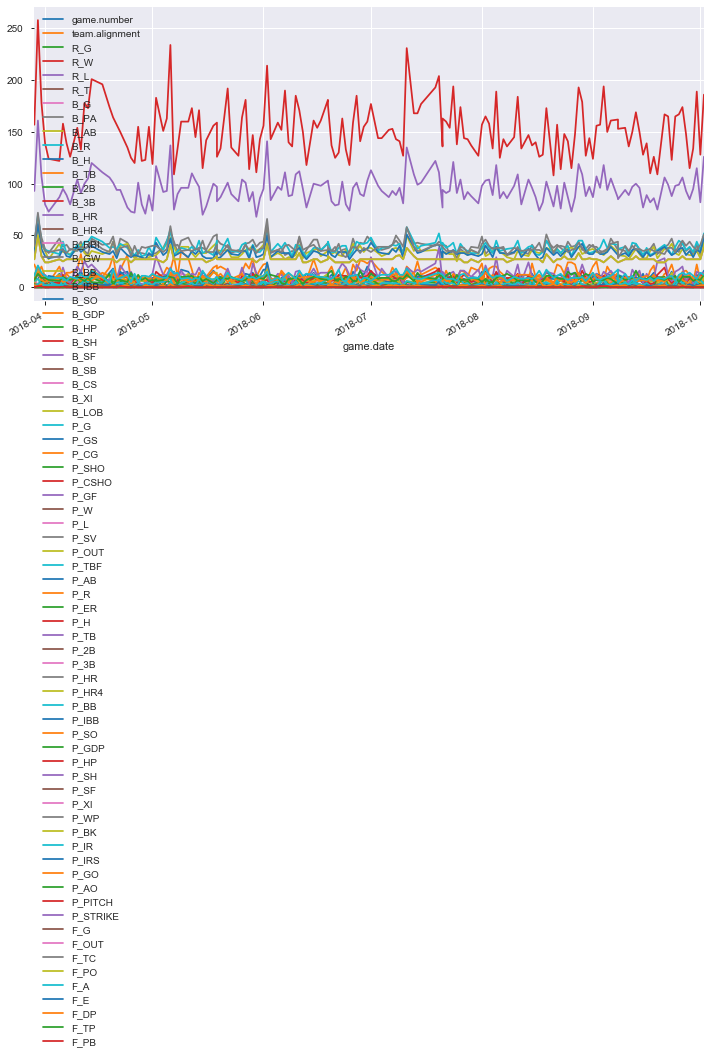

In [17]:
cubs.plot(figsize=(12,6));

In [11]:
cubs_home = cubs[cubs['team.key'] == 'CHN']

In [12]:
cubs_home.head()

,game.key,game.source,game.number,site.key,season.phase,team.alignment,team.key,opponent.key,R_G,R_W,R_L,R_T,B_G,B_PA,B_AB,B_R,B_H,B_TB,B_2B,B_3B,B_HR,B_HR4,B_RBI,B_GW,B_BB,B_IBB,B_SO,B_GDP,B_HP,B_SH,B_SF,B_SB,B_CS,B_XI,B_LOB,P_G,P_GS,P_CG,P_SHO,P_CSHO,P_GF,P_W,P_L,P_SV,P_OUT,P_TBF,P_AB,P_R,P_ER,P_H,P_TB,P_2B,P_3B,P_HR,P_HR4,P_BB,P_IBB,P_SO,P_GDP,P_HP,P_SH,P_SF,P_XI,P_WP,P_BK,P_IR,P_IRS,P_GO,P_AO,P_PITCH,P_STRIKE,F_G,F_OUT,F_TC,F_PO,F_A,F_E,F_DP,F_TP,F_PB
game.date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-03-29,MIA201803290,evt,0,MIA02,R,0,CHN,MIA,1,1,0,0,1,44,35,8,9,22,4,0,3,0,8,NaN,5,2,10,1,3,0,0,1,0,1,9,1,1,0,0,0,1,1,0,0,27,40,33,4,3,8,12,2,1,0,0,6,0,7,2,1,0,0,0,0,0,2,0,11,7,157,93,1,27,40,27,11,2,2,0,0
2018-03-30,MIA201803300,evt,0,MIA02,R,0,CHN,MIA,1,0,1,0,1,67,58,1,8,13,2,0,1,0,1,NaN,8,1,20,1,1,0,0,0,0,0,15,1,1,0,0,0,1,0,1,0,50,70,61,2,2,12,12,0,0,0,0,8,0,14,1,1,0,0,0,0,0,3,1,20,13,258,161,1,50,72,50,21,1,1,0,1
2018-03-31,MIA201803310,evt,0,MIA02,R,0,CHN,MIA,1,1,0,0,1,48,41,10,13,20,4,0,1,0,9,NaN,5,0,11,1,0,1,1,0,0,0,8,1,1,0,0,0,1,1,0,0,30,42,37,6,6,10,13,0,0,1,0,3,0,7,2,2,0,0,0,0,0,4,1,11,9,178,107,1,30,44,30,14,0,3,0,1
2018-04-01,MIA201804010,evt,0,MIA02,R,0,CHN,MIA,1,0,1,0,1,37,35,0,8,10,2,0,0,0,0,NaN,1,0,6,0,1,0,0,0,0,0,10,1,1,0,0,0,1,0,1,0,24,36,30,6,6,8,12,4,0,0,0,5,1,5,0,0,1,0,0,1,0,0,0,8,9,139,80,1,24,35,24,11,0,0,0,0
2018-04-02,CIN201804020,evt,0,CIN09,R,0,CHN,CIN,1,0,1,0,1,33,27,0,2,4,0,1,0,0,0,NaN,5,0,11,1,1,0,0,0,1,0,6,1,1,0,0,0,1,0,1,0,24,35,28,1,1,5,8,1,1,0,0,6,0,7,1,0,1,0,0,1,0,0,0,6,7,124,73,1,24,34,24,9,1,1,0,0


In [13]:
cubs_v_LA = cubs_home[cubs_home['opponent.key'] == 'LAN']

In [14]:
cubs_v_LA.head()

,game.key,game.source,game.number,site.key,season.phase,team.alignment,team.key,opponent.key,R_G,R_W,R_L,R_T,B_G,B_PA,B_AB,B_R,B_H,B_TB,B_2B,B_3B,B_HR,B_HR4,B_RBI,B_GW,B_BB,B_IBB,B_SO,B_GDP,B_HP,B_SH,B_SF,B_SB,B_CS,B_XI,B_LOB,P_G,P_GS,P_CG,P_SHO,P_CSHO,P_GF,P_W,P_L,P_SV,P_OUT,P_TBF,P_AB,P_R,P_ER,P_H,P_TB,P_2B,P_3B,P_HR,P_HR4,P_BB,P_IBB,P_SO,P_GDP,P_HP,P_SH,P_SF,P_XI,P_WP,P_BK,P_IR,P_IRS,P_GO,P_AO,P_PITCH,P_STRIKE,F_G,F_OUT,F_TC,F_PO,F_A,F_E,F_DP,F_TP,F_PB
game.date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-06-19,CHN201806191,evt,1,CHI11,R,1,CHN,LAN,1,0,1,0,1,43,35,3,8,10,2,0,0,0,3,NaN,8,2,11,0,0,0,0,0,0,0,13,1,1,0,0,0,1,0,1,0,27,42,30,4,4,6,14,3,1,1,0,8,0,10,0,1,3,0,0,2,0,2,0,7,7,181,103,1,27,36,27,9,0,0,0,0
2018-06-19,CHN201806192,evt,2,CHI11,R,1,CHN,LAN,1,1,0,0,1,39,35,2,8,14,1,1,1,0,2,NaN,4,2,10,0,0,0,0,0,0,0,10,1,1,0,0,0,1,1,0,0,30,44,37,1,1,9,11,2,0,0,0,7,1,9,1,0,0,0,0,0,0,3,0,5,13,176,102,1,30,38,30,8,0,2,0,0
2018-06-20,CHN201806200,evt,0,CHI11,R,1,CHN,LAN,1,1,0,0,1,35,32,4,12,20,3,1,1,0,4,NaN,1,0,7,0,1,1,0,1,2,0,7,1,1,0,1,1,1,1,0,0,27,34,31,0,0,6,9,3,0,0,0,3,0,2,0,0,0,0,0,0,0,0,0,7,16,137,83,1,27,35,27,8,0,2,0,0
2018-06-25,LAN201806250,evt,0,LOS03,R,0,CHN,LAN,1,0,1,0,1,33,31,1,7,7,0,0,0,0,1,NaN,1,0,9,1,0,0,1,0,0,0,5,1,1,0,0,0,1,0,1,0,24,30,27,2,2,5,12,1,0,2,0,3,0,4,1,0,0,0,0,0,0,1,0,8,10,118,74,1,24,35,24,11,0,1,0,0
2018-06-26,LAN201806260,evt,0,LOS03,R,0,CHN,LAN,1,1,0,0,1,47,42,9,15,22,1,0,2,1,9,NaN,5,0,9,0,0,0,0,2,1,0,11,1,1,0,0,0,1,1,0,0,27,35,32,4,4,6,6,0,0,0,0,3,0,11,0,0,0,0,0,2,0,2,1,8,6,159,96,1,27,39,27,11,1,1,0,0


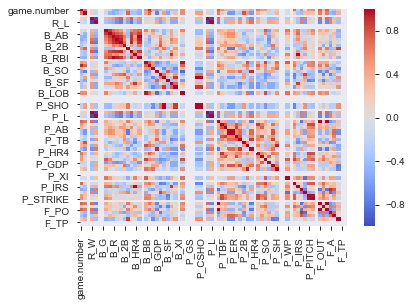

In [35]:
sns.heatmap(cubs_v_LA.corr(), cmap='coolwarm');